In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [6]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [7]:
mensual_p = mensual['n_trips']

In [8]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [9]:
mensual_p = mensual_p.reset_index()

In [10]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [11]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.06)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=18, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/aeyjysdz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/_fls72as.json
02:03:44 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=34425', 'data', 'file=/tmp/tmpul_yn2ty/aeyjysdz.json', 'init=/tmp/tmpul_yn2ty/_fls72as.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelkbuq_5va/prophet_model-20241119020344_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=34425', 'data', 'file=/tmp/tmpul_yn2ty/aeyjysdz.json', 'init=/tmp/tmpul_yn2ty/_fls72as.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelkbuq_5va/prophet_model-20241119020344_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

02:03:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=34425', 'data', 'file=/tmp/tmpul_yn2ty/aeyjysdz.json', 'init=/tmp/tmpul_yn2ty/_fls72as.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelkbuq_5va/prophet_model-20241119020344_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpul_yn2ty/prophet_modelkbuq_5va/prophet_model-20241119020344_1.csv
 console_msgs (if any):
	/tmp/tmpul_yn2ty/prophet_modelkbuq_5va/prophet_model-20241119020344_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [12]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.826102e+06,2.981732e+06,3.178769e+06,2.757096e+06,2.881870e+06,251726.288615,191784.286362,311894.763343,251726.288615,191784.286362,311894.763343,0.0,0.0,0.0,3.077829e+06
1,2022-04-30,2.812798e+06,2.885903e+06,3.066167e+06,2.755592e+06,2.860412e+06,159748.695414,101437.517085,220251.639105,159748.695414,101437.517085,220251.639105,0.0,0.0,0.0,2.972546e+06
2,2022-05-31,2.799169e+06,2.944615e+06,3.128111e+06,2.747274e+06,2.840105e+06,238230.917641,181826.966175,296959.723615,238230.917641,181826.966175,296959.723615,0.0,0.0,0.0,3.037400e+06
3,2022-06-30,2.786552e+06,2.824276e+06,3.009423e+06,2.737453e+06,2.827578e+06,134683.676307,77503.553647,187181.397452,134683.676307,77503.553647,187181.397452,0.0,0.0,0.0,2.921236e+06
4,2022-07-31,2.772909e+06,2.502478e+06,2.688286e+06,2.730292e+06,2.811581e+06,-172877.974663,-235578.404372,-113849.953984,-172877.974663,-235578.404372,-113849.953984,0.0,0.0,0.0,2.600031e+06
5,2022-08-31,2.757826e+06,2.431785e+06,2.618201e+06,2.713860e+06,2.794467e+06,-233404.106075,-288400.251049,-177789.446721,-233404.106075,-288400.251049,-177789.446721,0.0,0.0,0.0,2.524422e+06
6,2022-09-30,2.741100e+06,2.438095e+06,2.648978e+06,2.697991e+06,2.778846e+06,-201586.799748,-265255.068592,-137291.616670,-201586.799748,-265255.068592,-137291.616670,0.0,0.0,0.0,2.539513e+06
7,2022-10-31,2.721746e+06,2.862730e+06,3.073603e+06,2.684724e+06,2.762126e+06,245562.188953,171987.014957,313975.204960,245562.188953,171987.014957,313975.204960,0.0,0.0,0.0,2.967308e+06
8,2022-11-30,2.700970e+06,2.539131e+06,2.756677e+06,2.660239e+06,2.741749e+06,-58358.647521,-114775.191378,2664.006250,-58358.647521,-114775.191378,2664.006250,0.0,0.0,0.0,2.642611e+06
9,2022-12-31,2.678443e+06,2.621888e+06,2.829678e+06,2.635527e+06,2.719019e+06,48478.375999,-23828.238846,129736.421093,48478.375999,-23828.238846,129736.421093,0.0,0.0,0.0,2.726922e+06


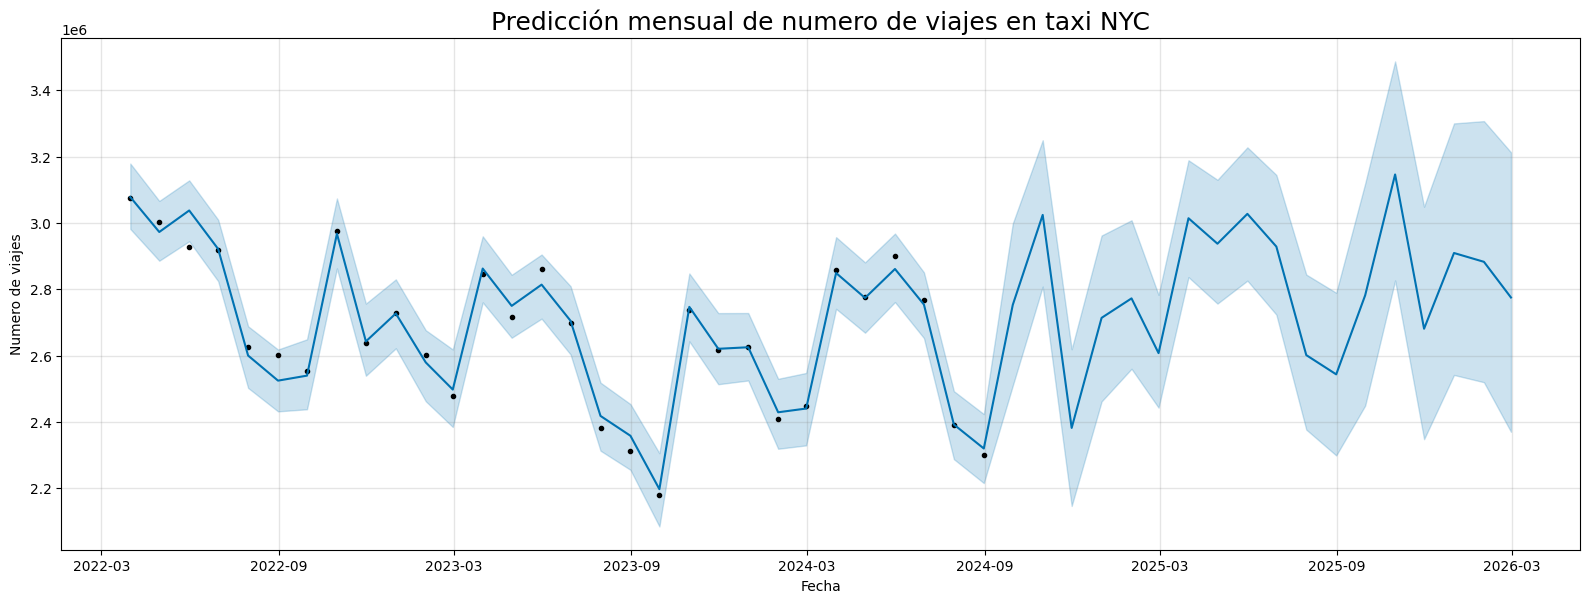

In [13]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

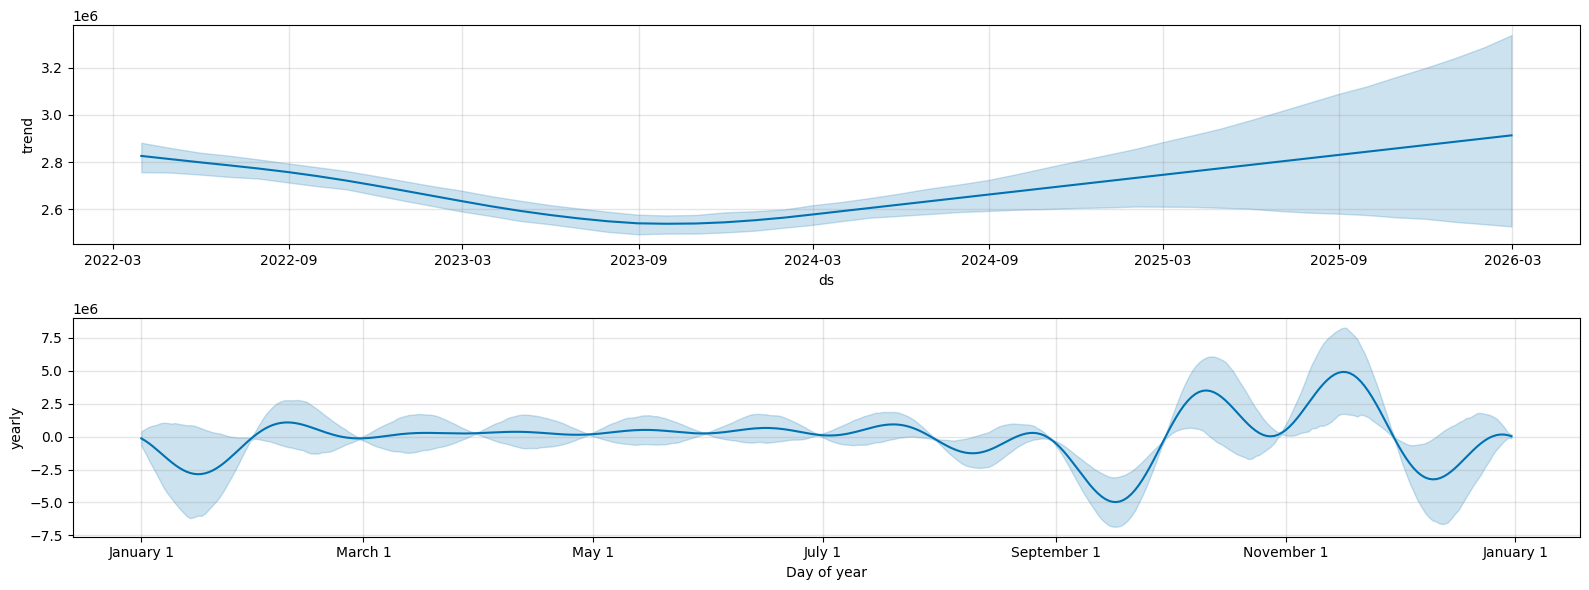

In [14]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [15]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [16]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/k75kaiuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/39r8eswz.json
02:03:54 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=84269', 'data', 'file=/tmp/tmpul_yn2ty/k75kaiuw.json', 'init=/tmp/tmpul_yn2ty/39r8eswz.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelatx7lv79/prophet_model-20241119020354_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=84269', 'data', 'file=/tmp/tmpul_yn2ty/k75kaiuw.json', 'init=/tmp/tmpul_yn2ty/39r8eswz.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelatx7lv79/prophet_model-20241119020354_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

02:04:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=84269', 'data', 'file=/tmp/tmpul_yn2ty/k75kaiuw.json', 'init=/tmp/tmpul_yn2ty/39r8eswz.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelatx7lv79/prophet_model-20241119020354_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpul_yn2ty/prophet_modelatx7lv79/prophet_model-20241119020354_1.csv
 console_msgs (if any):
	/tmp/tmpul_yn2ty/prophet_modelatx7lv79/prophet_model-20241119020354_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [17]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.323458e+06,1.962367e+06,2.706079e+06,2179200,2023-09-01
1,2023-10-31,2.718286e+06,2.329905e+06,3.123499e+06,2736389,2023-09-01
2,2023-11-30,2.453654e+06,2.071677e+06,2.834757e+06,2616757,2023-09-01
3,2023-12-31,2.476776e+06,2.100450e+06,2.820491e+06,2625768,2023-09-01
4,2024-01-31,2.353816e+06,1.987495e+06,2.760062e+06,2409342,2023-09-01
5,2024-02-29,2.169114e+06,1.321599e+06,3.039545e+06,2448952,2023-09-01
6,2024-03-31,2.669070e+06,2.175544e+06,3.111037e+06,2858661,2023-09-01
7,2024-04-30,2.688799e+06,2.277141e+06,3.141082e+06,2777362,2023-09-01
8,2024-05-31,2.349638e+06,1.852928e+06,2.880536e+06,2899539,2023-09-01
9,2024-06-30,2.489061e+06,1.953396e+06,3.029099e+06,2767032,2023-09-01


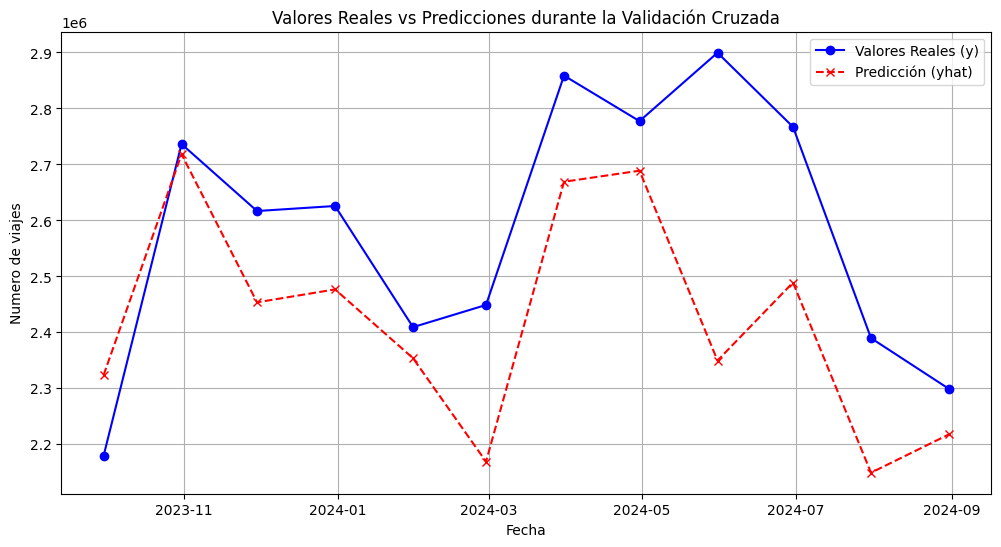

In [18]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


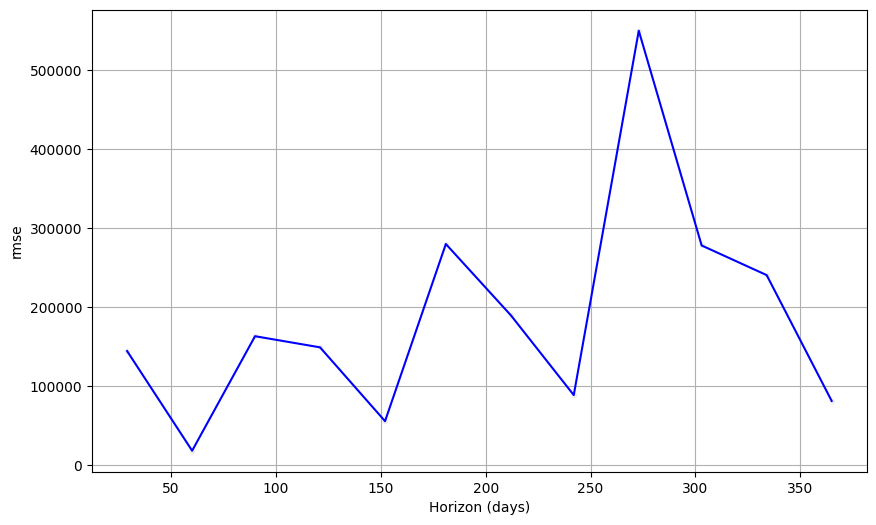

In [19]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [20]:
df_p_1 = performance_metrics(df_cv_1)

In [21]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 186454.91225827739


In [22]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 186454.91225827739


In [23]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [24]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.07111996364015398


In [25]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,5.326519e+10,186454.912258,186454.912258,0.071120,0.071120,0.074678,0.916667
std,109 days 20:33:46.987269072,8.305521e+10,142061.796969,142061.796969,0.049788,0.049788,0.055076,0.288675
min,29 days 00:00:00,3.277224e+08,18103.103364,18103.103364,0.006616,0.006616,0.006638,0.000000
25%,113 days 06:00:00,7.529455e+09,86713.275293,86713.275293,0.034450,0.034450,0.035055,1.000000
50%,196 days 12:00:00,2.440061e+10,156047.549037,156047.549037,0.064264,0.064264,0.064206,1.000000
75%,280 days 12:00:00,6.267847e+10,249828.900176,249828.900176,0.100498,0.100498,0.105815,1.000000
max,365 days 00:00:00,3.023915e+11,549901.376510,549901.376510,0.189651,0.189651,0.209519,1.000000


In [26]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,5.326519e+10,230792.530823,186454.912258,0.07112,0.064264,0.074678,0.916667


In [28]:
forecast_1.to_csv('forecast_mensual.csv')